# Rips Experiments:
Takeaway:
1. Python can provide about 2-3 times speedup on the most cases, while C++ can often provide 5-6 times speedup
2. Filtration size seems unrelated to the updating time 
3. There seems to be a linear relation between standard reduction time and the number of non-zeros.  
4. To choose from the two options: a) rebuilding from scratch or b) updating persistence seems to depend on the number of non-zeros!!!!!!

In [1]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.spatial.distance as distance

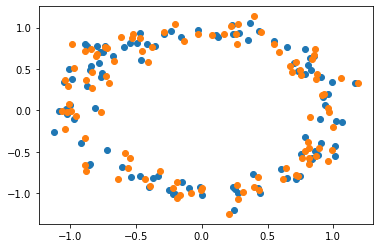

In [2]:
n = 100
X = np.random.uniform(-1,1,(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1)
X2 = X + 0.05*np.random.randn(n,2)
fig = plt.scatter(X[:,0], X[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()

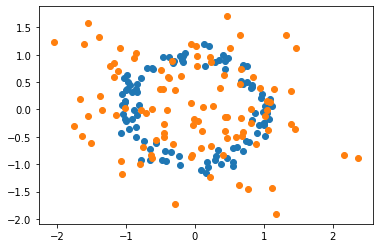

In [3]:
n = 100
Z = np.random.normal(size=(n,2))
Z = Z / np.linalg.norm(Z, axis=1).reshape(-1,1)
Z = Z + np.random.normal(size=(n,2), scale = 0.1)

Z2 = Z + 0.5*np.random.randn(n,2)
fig = plt.scatter(Z[:,0], Z[:,1])
plt.scatter(Z2[:,0], Z2[:,1])
plt.show()

In [3]:
def time_BATS_updates_rips(X, Y, dmax = 2):
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, dmax)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    DY = distance.squareform(distance.pdist(Y))
    rY = bats.enclosing_radius(bats.Matrix(DY))
    t1 = time.monotonic()
    #print("setup2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    FY = bats.LightRipsFiltration(bats.Matrix(DY), rY, dmax)
    t1 = time.monotonic()
    #print("construct2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    RY = bats.reduce(FY, bats.F2())
    t1 = time.monotonic()
    #print("reduce2: {} sec.".format(t1 - t0))
    t_reb = t1-t0
    
    t0 = time.monotonic()
    update_info = bats.UpdateInfoLightFiltration(F, FY)
    R.update_filtration_general(update_info)
    t1 = time.monotonic()
    #print("update2: {} sec.".format(t1 - t0))
    t_upd = t1-t0
    factor = round(t_reb/t_upd, 4)
    return factor

for i in range(5):
    print(time_BATS_updates_rips(X, X2))

2.3744
1.297
1.3513
1.4527
1.3003


In [6]:
# Not good on large change filtration
for i in range(5):
    print(time_BATS_updates_rips(Z, Z2))

0.1078
0.2474
0.2296
0.2067
0.2173


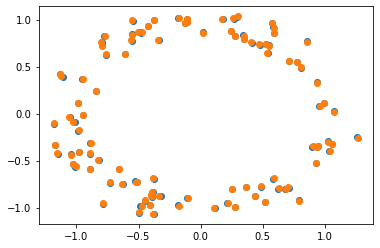

3.0633
3.4469
3.4919
3.0868
3.4184


In [8]:
n = 100
X = np.random.uniform(-1,1,(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1)
X2 = X + 0.005*np.random.randn(n,2)
fig = plt.scatter(X[:,0], X[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()
for i in range(5):
    print(time_BATS_updates_rips(X, X2))

In [14]:
for i in range(5):
    print(time_BATS_updates_rips(X, X2))

3.2591
3.1515
3.3471
3.4594
3.2131


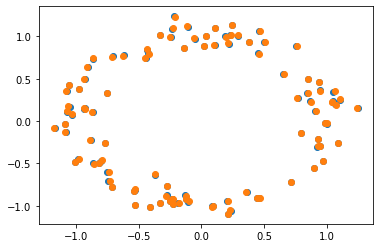

2.3129
2.6829
2.775
2.6283
2.6579


In [12]:
n = 100
Z = np.random.normal(size=(n,2))
Z = Z / np.linalg.norm(Z, axis=1).reshape(-1,1)
Z = Z + np.random.normal(size=(n,2), scale = 0.1)

Z2 = Z + 0.005*np.random.randn(n,2)
fig = plt.scatter(Z[:,0], Z[:,1])
plt.scatter(Z2[:,0], Z2[:,1])
plt.show()
for i in range(5):
    print(time_BATS_updates_rips(Z, Z2))

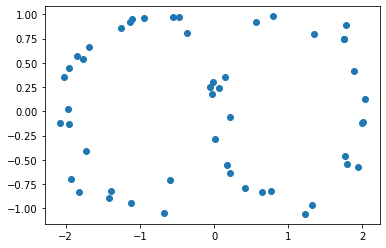

In [113]:
# first, generate two noisy circles 
n = 50
Y = np.random.normal(size=(n,2))
Y = Y / np.linalg.norm(Y, axis=1).reshape(-1,1)
Y = Y + np.random.normal(size=(n,2), scale = 0.1 )

Y[:(n//2),0] = Y[:(n//2),0] - 1
Y[(n//2):,0] = Y[(n//2):,0] + 1
fig = plt.scatter(Y[:,0], Y[:,1])

Y2 = Y + 0.005*np.random.randn(n,2)

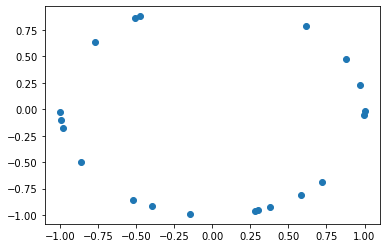

In [14]:
def gen_circle(n = 50):
    X = np.random.normal(size=(n,2))
    X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
    # std = 0.1 
    # Y = Y + np.random.normal(size=(n,2), scale = 0.1 )
    return X

def draw_2D_scatter(Y):
    fig = plt.scatter(Y[:,0], Y[:,1])
    plt.show()
    

draw_2D_scatter(gen_circle(20))

In [10]:
np.random.normal?

In [9]:
def metric_update(X)
    pdist(X, 'minkowski', p=2.)

In [124]:
def time_BATS_updates_rips(X, Y, dmax = 2):
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, dmax)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    DY = distance.squareform(distance.pdist(Y))
    rY = bats.enclosing_radius(bats.Matrix(DY))
    t1 = time.monotonic()
    #print("setup2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    FY = bats.LightRipsFiltration(bats.Matrix(DY), rY, dmax)
    t1 = time.monotonic()
    #print("construct2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    RY = bats.reduce(FY, bats.F2())
    t1 = time.monotonic()
    #print("reduce2: {} sec.".format(t1 - t0))
    t_reb = t1-t0
    
    t0 = time.monotonic()
    update_info = bats.UpdateInfoLightFiltration(F, FY)
    R.update_filtration_general(update_info)
    t1 = time.monotonic()
    #print("update2: {} sec.".format(t1 - t0))
    t_upd = t1-t0
    factor = round(t_reb/t_upd, 4)
    return factor

time_BATS_updates_rips(Y, Y2)

2.3797

In [4]:
def time_BATS_updates_enc_rips_record(X, Y, dmax = 2):
    rec = []
    
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    F = bats.LightRipsFiltration(bats.Matrix(DX), rX, dmax)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    nnz_old_U = np.sum(R.nnz_U())
    nnz_old_R = np.sum(R.nnz_R())
    
    t0 = time.monotonic()
    DY = distance.squareform(distance.pdist(Y))
    rY = bats.enclosing_radius(bats.Matrix(DY))
    t1 = time.monotonic()
    #print("setup2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    FY = bats.LightRipsFiltration(bats.Matrix(DY), rY, dmax)
    t1 = time.monotonic()
    #print("construct2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    
    t0 = time.monotonic()
    RY = bats.reduce(FY, bats.F2())
    t1 = time.monotonic()
    #print("reduce2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    t_reb = t1-t0
    nnz_reb_U = np.sum(RY.nnz_U())
    nnz_reb_R = np.sum(RY.nnz_R())
    
    t0 = time.monotonic()
    update_info = bats.UpdateInfoLightFiltration(F, FY)
    R.update_filtration_general(update_info)
    t1 = time.monotonic()
    #print("update2: {} sec.".format(t1 - t0))
    rec.append(t1-t0)
    t_upd = t1-t0
    factor = round(t_reb/t_upd, 4)
    rec.append(factor)
    nnz_upd_U = np.sum(R.nnz_U())
    nnz_upd_R = np.sum(R.nnz_R())
    
    rec.append(nnz_old_U)
    rec.append(nnz_reb_U)
    rec.append(nnz_upd_U)
    rec.append(nnz_old_R)
    rec.append(nnz_reb_R)
    rec.append(nnz_upd_R)
    
    return rec

time_BATS_updates_enc_rips_record(X, X2)

[0.0032541260006837547,
 0.029679282000870444,
 0.3230764359977911,
 0.00019209799938835204,
 0.019202871997549664,
 0.2193147969956044,
 0.18486876300448785,
 1.1863,
 2015834,
 1584719,
 1931687,
 12771,
 12527,
 13230]

In [65]:
def time_BATS_updates_rips_slow(X, Y, dmax = 2):
    t0 = time.monotonic()
    DX = distance.squareform(distance.pdist(X))
    rX = bats.enclosing_radius(bats.Matrix(DX))
    t1 = time.monotonic()
    #print("setup1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    F = bats.RipsFiltration(bats.Matrix(DX), rX, dmax)
    t1 = time.monotonic()
    #print("construct1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    R = bats.reduce(F, bats.F2())
    t1 = time.monotonic()
    #print("reduce1: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    DY = distance.squareform(distance.pdist(Y))
    rY = bats.enclosing_radius(bats.Matrix(DY))
    t1 = time.monotonic()
    #print("setup2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    FY = bats.RipsFiltration(bats.Matrix(DY), rY, dmax)
    t1 = time.monotonic()
    #print("construct2: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    RY = bats.reduce(FY, bats.F2())
    t1 = time.monotonic()
    #print("reduce2: {} sec.".format(t1 - t0))
    t_reb = t1-t0
    
    t0 = time.monotonic()
    update_info = bats.UpdateInfoFiltration(F, FY)
    R.update_filtration_general(update_info)
    t1 = time.monotonic()
    #print("update2: {} sec.".format(t1 - t0))
    t_upd = t1-t0
    factor = round(t_reb/t_upd, 4)
    
    return factor

time_BATS_updates_rips_slow(Y, Y2)

0.8505

## Speedup for different size of datasets

In [53]:
for n in np.linspace(20, 200, num = 10, dtype = int):
    print("n = {}.".format(n))
    X = gen_circle(n)
    X2 = X + np.random.normal(size=(n,2), scale = 0.1)
    print("speedup factor: ", time_BATS_updates_rips(Y, Y2))

n = 20.
speedup factor:  4.9588
n = 40.
speedup factor:  1.7011
n = 60.
speedup factor:  2.0115
n = 80.
speedup factor:  2.3634
n = 100.
speedup factor:  2.4245
n = 120.
speedup factor:  1.5154
n = 140.
speedup factor:  2.623
n = 160.
speedup factor:  2.6582
n = 180.
speedup factor:  2.2386
n = 200.
speedup factor:  2.2137


In [48]:
# Max dimension is 3
for n in np.linspace(20, 100, num = 5, dtype = int):
    print("n = {}.".format(n))
    X = gen_circle(n)
    X2 = X + np.random.normal(size=(n,2), scale = 0.1)
    print("speedup factor: ", time_BATS_updates_rips(Y, Y2, 3))

n = 20.
speedup factor:  2.2164
n = 40.
speedup factor:  2.3459
n = 60.
speedup factor:  1.6341
n = 80.
speedup factor:  1.9204
n = 100.
speedup factor:  2.4067


In [49]:
# Max dimension is 4
for n in np.linspace(20, 100, num = 5, dtype = int):
    print("n = {}.".format(n))
    X = gen_circle(n)
    X2 = X + np.random.normal(size=(n,2), scale = 0.1)
    print("speedup factor: ", time_BATS_updates_rips(Y, Y2, 4))

n = 20.
speedup factor:  2.8325
n = 40.
speedup factor:  2.1004
n = 60.
speedup factor:  2.2064
n = 80.
speedup factor:  2.5723
n = 100.
speedup factor:  2.2003


In [55]:
np.linspace(0.01, 1, num = 10)

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

std = 0.01.


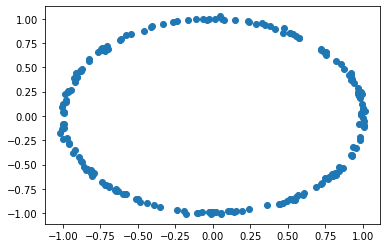

std = 0.12.


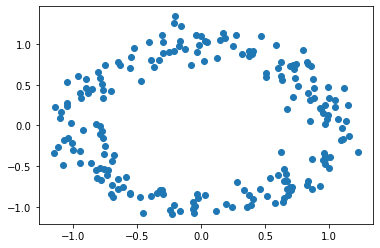

std = 0.23.


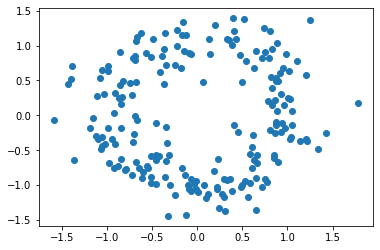

std = 0.34.


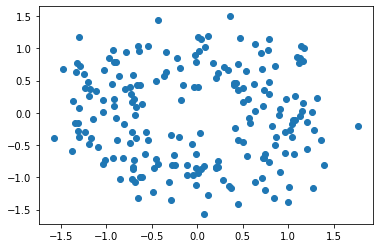

std = 0.45.


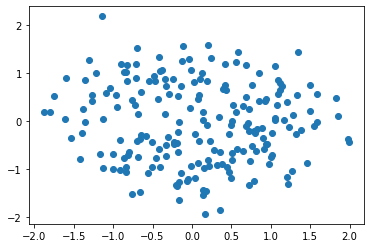

std = 0.56.


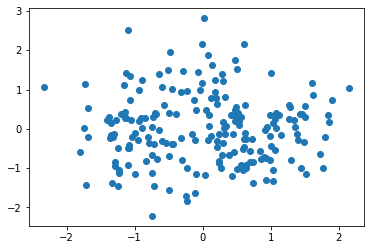

std = 0.67.


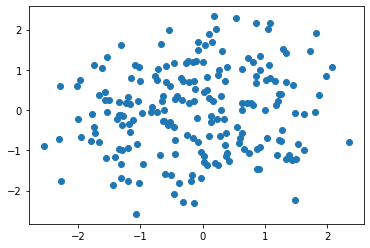

std = 0.78.


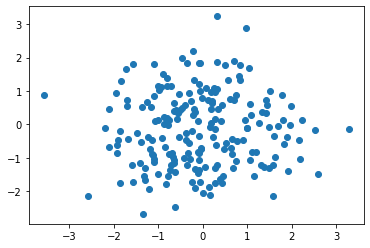

std = 0.89.


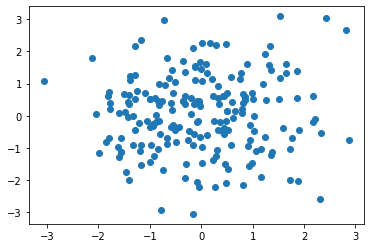

std = 1.0.


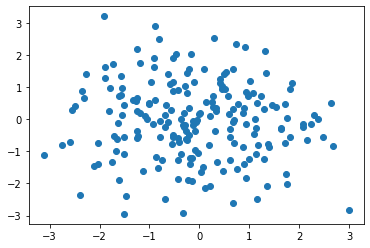

In [57]:
# Add noise, then the dataset become more and more like normal distribution
for std in np.linspace(0.01, 1, num = 10):
    print("std = {}.".format(std))
    X = gen_circle(n)
    X2 = X + np.random.normal(size=(n,2), scale = std)
    draw_2D_scatter(X2)

In [61]:
# Add noise, then the dataset become more and more like normal distribution
# the result is very different from 
n = 50 
X = gen_circle(n)
for std in np.linspace(0.01, 1, num = 10):
    print("std = {}".format(std))
    X2 = X + np.random.normal(size=(n,2), scale = std)
    print("speedup factor: ", time_BATS_updates_rips(Y, Y2, 3))

std = 0.01
speedup factor:  2.4251
std = 0.12
speedup factor:  1.9933
std = 0.23
speedup factor:  2.6858
std = 0.34
speedup factor:  2.5469
std = 0.45
speedup factor:  2.4915
std = 0.56
speedup factor:  2.686
std = 0.67
speedup factor:  2.87
std = 0.78
speedup factor:  2.6476
std = 0.89
speedup factor:  2.5544
std = 1.0
speedup factor:  2.5331


In [66]:
# Without light Rips filtration, the updating performance are not good.
n = 50 
X = gen_circle(n)
for std in np.linspace(0.01, 1, num = 10):
    print("std = {}".format(std))
    X2 = X + np.random.normal(size=(n,2), scale = std)
    print("speedup factor: ", time_BATS_updates_rips_slow(Y, Y2, 3))

std = 0.01
speedup factor:  1.369
std = 0.12
speedup factor:  1.5489
std = 0.23
speedup factor:  1.3225
std = 0.34
speedup factor:  1.5961
std = 0.45
speedup factor:  1.5451
std = 0.56
speedup factor:  1.5008
std = 0.67
speedup factor:  1.5594
std = 0.78
speedup factor:  1.1424
std = 0.89
speedup factor:  1.5467
std = 1.0
speedup factor:  1.521


### Todo: updating flag


# The following Example is trying to show the relation between U and time spent for computing PH.

Updating option is not good, but we provide a way to choose from two options: rebuilding or updating.

In [71]:
import csv # used to store csv file

def time_BATS_update(X,Y):
    tlist = []
    
    m1 = bats.Euclidean()

    dmax = 3
    rmax = 2
    data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
    data_Y = bats.DataSet(bats.Matrix(Y)) # put into a bats.DataSet

    t0 = time.monotonic()
    F_X = bats.RipsFiltration(data, m1, rmax, dmax) # generate a RipsFiltration
    R_X = bats.reduce(F_X, bats.F2()) # reduce with F2 coefficients
    t1 = time.monotonic()
    tlist.append(t1-t0)
    nnz_old_U = np.sum(R_X.nnz_U())
    #print("time to reduce: {} sec.".format(t1 - t0))
    
    
    # Rebuild
    t0 = time.monotonic()
    F_Y = bats.RipsFiltration(data_Y, m1, rmax, dmax) # generate a RipsFiltration
    R_Y = bats.reduce(F_Y, bats.F2()) # reduce with F2 coefficients
    t1 = time.monotonic()
    tlist.append(t1-t0)
    nnz_reb_U = np.sum(R_Y.nnz_U())

    # Update
    t0 = time.monotonic()
    F_Y = bats.RipsFiltration(data_Y, m1, rmax, dmax) # generate a new RipsFiltration
    UI = bats.UpdateInfoFiltration(F_X, F_Y)
    R_X.update_filtration_general(UI)
    t1 = time.monotonic()
    #print("time to update: {} sec.".format(t1 - t0))
    tlist.append(t1-t0)
    nnz_upd_U = np.sum(R_X.nnz_U())
    
    tlist.append(nnz_old_U)
    tlist.append(nnz_reb_U)
    tlist.append(nnz_upd_U)
    return tlist

# write into files
header = ['std','initial_redue', 'rebuild', 'update','nnz_old_U', 'nnz_reb', 'nnz_upd'] # set header of csv file
data = []

n = 50
X = np.random.normal(size=(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
with open('std_increase.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    # write the header
    writer.writerow(header)
    
    for sigma in np.linspace(1e-1, 1, num=10):
        # create dataset
        Y = X + np.random.normal(size=(n,2), scale = sigma )
        record_n = []
        num_repeats = 2
        for i in range(num_repeats):
            record_n.append(time_BATS_update(X,Y))

        # get mean time and add to records
        record_n = np.array(record_n)
        record_n = np.mean(record_n, axis = 0)
        record_n = list(record_n)
        record_n.insert(0, sigma)
        data.append(record_n)

    # write multiple rows
    writer.writerows(data)

In [88]:
import csv # used to store csv file

def time_BATS_update_light(X,Y):
    tlist = []
    
    m1 = bats.Euclidean()

    dmax = 3
    rmax = 2
    data = bats.DataSet(bats.Matrix(X)) # put into a bats.DataSet
    data_Y = bats.DataSet(bats.Matrix(Y)) # put into a bats.DataSet

    t0 = time.monotonic()
    F_X = bats.LightRipsFiltration(data, m1, rmax, dmax) # generate a RipsFiltration
    R_X = bats.reduce(F_X, bats.F2()) # reduce with F2 coefficients
    t1 = time.monotonic()
    tlist.append(t1-t0)
    nnz_old_U = np.sum(R_X.nnz_U())
    nnz_old_R = np.sum(R_X.nnz_R())
    
    
    # Rebuild
    t0 = time.monotonic()
    F_Y = bats.LightRipsFiltration(data_Y, m1, rmax, dmax) # generate a RipsFiltration
    R_Y = bats.reduce(F_Y, bats.F2()) # reduce with F2 coefficients
    t1 = time.monotonic()
    tlist.append(t1-t0)
    nnz_reb_U = np.sum(R_Y.nnz_U())
    nnz_reb_R = np.sum(R_Y.nnz_R())
    
    # Update
    t0 = time.monotonic()
    F_Y = bats.LightRipsFiltration(data_Y, m1, rmax, dmax) # generate a new RipsFiltration
    UI = bats.UpdateInfoLightFiltration(F_X, F_Y)
    R_X.update_filtration_general(UI)
    t1 = time.monotonic()
    tlist.append(t1-t0)
    tlist.append(tlist[-2]/tlist[-1])
    nnz_upd_U = np.sum(R_X.nnz_U())
    nnz_upd_R = np.sum(R_X.nnz_R())
    
    tlist.append(nnz_old_U)
    tlist.append(nnz_reb_U)
    tlist.append(nnz_upd_U)
    tlist.append(nnz_old_R)
    tlist.append(nnz_reb_R)
    tlist.append(nnz_upd_R)
    return tlist


# write into files
header = ['std','initial_redue', 'rebuild', 'update', 'factor',
          'nnz_old_U', 'nnz_reb_U', 'nnz_upd_U',
          'nnz_old_R', 'nnz_reb_R', 'nnz_upd_R'] # set header of csv file
data = []

n = 50
X = np.random.normal(size=(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
with open('std_increase_light.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    
    # write the header
    writer.writerow(header)
    
    for sigma in np.linspace(1e-1, 1, num=10):
        # create dataset
        Y = X + np.random.normal(size=(n,2), scale = sigma )
        record_n = []
        num_repeats = 2
        for i in range(num_repeats):
            record_n.append(time_BATS_update_light(X,Y))

        # get mean time and add to records
        record_n = np.array(record_n)
        record_n = np.mean(record_n, axis = 0)
        record_n = list(record_n)
        record_n.insert(0, sigma)
        data.append(record_n)

    # write multiple rows
    writer.writerows(data)

In [89]:
import pandas as pd

In [96]:
df = pd.read_csv('std_increase_light.csv')

In [109]:
df

,std,initial_redue,rebuild,update,factor,nnz_old_U,nnz_reb_U,nnz_upd_U,nnz_old_R,nnz_reb_R,nnz_upd_R
0,0.1,1.025566,0.567234,0.701742,0.809704,4220663.0,1940522.0,2362139.0,77903.0,56283.0,80999.0
1,0.2,1.145476,0.382529,0.592939,0.643861,4220663.0,1126506.0,1326646.0,77903.0,47806.0,72394.0
2,0.3,1.051185,0.269629,0.588265,0.457507,4220663.0,1031647.0,1377173.0,77903.0,41344.0,64046.0
3,0.4,1.079637,0.175516,0.465202,0.380345,4220663.0,540414.0,867168.0,77903.0,36313.0,62277.0
4,0.5,1.054199,0.186106,0.476823,0.391373,4220663.0,513340.0,734005.0,77903.0,32909.0,58636.0
5,0.6,1.105743,0.107723,0.390727,0.276143,4220663.0,295432.0,387673.0,77903.0,21604.0,29488.0
6,0.7,1.035161,0.224826,0.594418,0.379057,4220663.0,765409.0,1082350.0,77903.0,31758.0,51956.0
7,0.8,1.097570,0.127139,0.469146,0.271027,4220663.0,297257.0,399248.0,77903.0,23093.0,29217.0
8,0.9,1.078231,0.113706,0.482999,0.235552,4220663.0,292232.0,482358.0,77903.0,22209.0,37064.0
9,1.0,1.120544,0.079399,0.375954,0.211355,4220663.0,199104.0,242339.0,77903.0,16524.0,23011.0


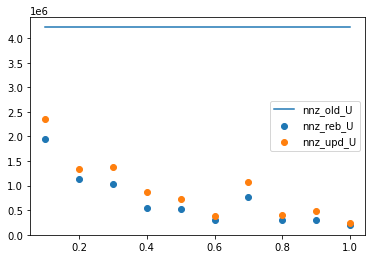

In [107]:
x = df['std']
for hder in header[6:8]:
    y = df[hder]
    # plot
    plt.scatter(x,y, label = hder)
    
    # beautify the x-labels
    # plt.gcf().autofmt_xdate()
    
plt.plot(x, df['nnz_old_U'], label = 'nnz_old_U' )
plt.legend()
plt.show()

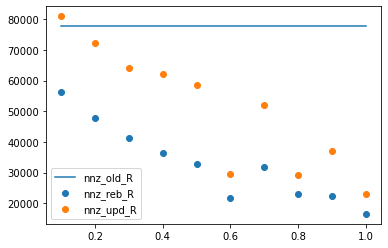

In [108]:
x = df['std']
for hder in header[9:]:
    y = df[hder]
    # plot
    plt.scatter(x,y, label = hder)
    
    # beautify the x-labels
    # plt.gcf().autofmt_xdate()
    
plt.plot(x, df['nnz_old_R'], label = 'nnz_old_R' )
plt.legend()
plt.show()

In [104]:
header[6:8]

['nnz_reb_U', 'nnz_upd_U']

In [101]:
np.array(df['std'])

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])